# BioRxiv Missing Method Section Detection

This notebook is designed to plot preprints where the method section cannot be detected using my document parser.

In [1]:
import pandas as pd
import plotnine as p9

In [2]:
biorxiv_sections_df = (
    pd.read_csv("../exploratory_data_analysis/output/biorxiv_article_sections.tsv", sep="\t")
    .assign(document=lambda x: x.document.apply(lambda x: f"{x}.xml"))
)
biorxiv_sections_df.head()

,section,document
0,research in context,440735_v1.xml
1,introduction,440735_v1.xml
2,results,440735_v1.xml
3,discussion,440735_v1.xml
4,material and methods,440735_v1.xml


# TSNE Embeddings for BioRxiv

In [3]:
biorxiv_embeddings_df = pd.read_csv(
    "../word_vector_experiment/output/embedding_output/tsne/biorxiv_tsne_300.tsv", 
    sep="\t"
)
biorxiv_embeddings_df.head()

,tsne1,tsne2,document,category,doi
0,-41.209663,32.463963,440735_v1.xml,genetics,10.1101/440735
1,-56.056430,-3.869386,775270_v1.xml,systems biology,10.1101/775270
2,-49.747417,20.084497,242404_v1.xml,genetics,10.1101/242404
3,40.919125,-16.865007,872994_v1.xml,neuroscience,10.1101/2019.12.11.872994
4,5.815606,34.753370,080853_v2.xml,developmental biology,10.1101/080853


In [4]:
biorxiv_tsne_method_section_df = (
    pd.merge(
        biorxiv_embeddings_df, 
        biorxiv_sections_df.query("section=='material and methods'").drop_duplicates(),
        on="document",
        how="left"
    )
    .assign(section=lambda x: x.section.apply(lambda x: "has_methods" if x=="material and methods" else "no_methods"))
    .groupby("doi")
    .agg({
        "doi": "last",
        "document": "last",
        "tsne1": "last",
        "tsne2": "last",
        "category":"last",
        "section": "last",
    })
    .reset_index(drop=True)
)
biorxiv_tsne_method_section_df.head()

,doi,document,tsne1,tsne2,category,section
0,10.1101/000026,000026_v1.xml,-53.334934,-15.060925,genetics,has_methods
1,10.1101/000042,000042_v2.xml,2.281935,18.688343,genomics,no_methods
2,10.1101/000067,000067_v1.xml,-31.700910,23.331476,genomics,has_methods
3,10.1101/000091,000091_v1.xml,18.863453,-10.938095,synthetic biology,no_methods
4,10.1101/000109,000109_v1.xml,-45.296585,-22.048760,evolutionary biology,has_methods


## Global View of tSNE plot

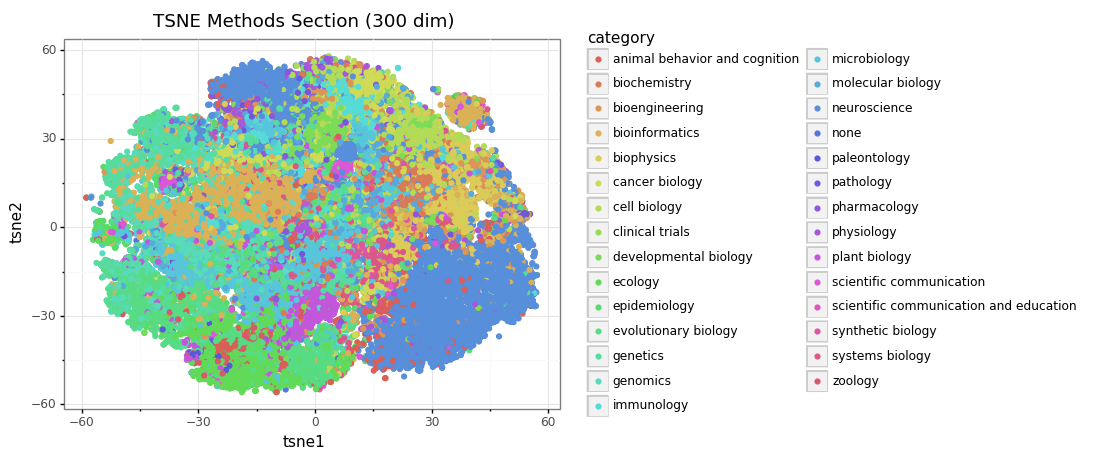

<ggplot: (-9223363273244096203)>


In [5]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
    )
    + p9.aes(x="tsne1", y="tsne2", color="category")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.labs(
        title="TSNE Methods Section (300 dim)"
    )
)
print(g)

## Neuroscience Methods Section

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/neuroscience_missing_methods.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


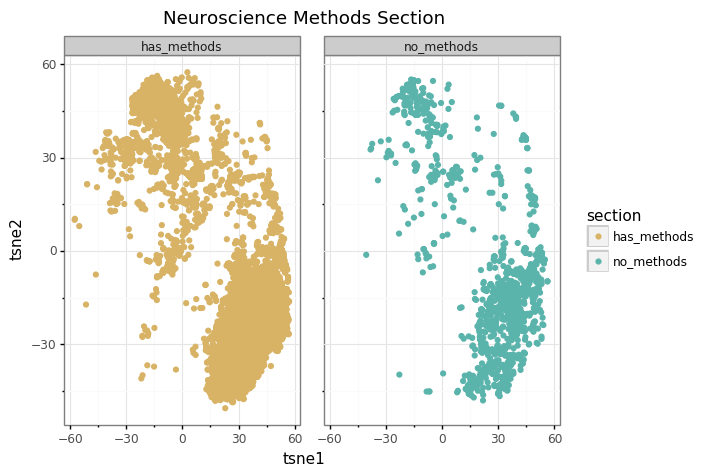

<ggplot: (-9223363273247440040)>


In [6]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='neuroscience'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point(position=p9.position_dodge(width=0.2))
    + p9.facet_wrap("section")
    + p9.theme_bw()
    + p9.theme(
        subplots_adjust={'wspace':0.10}
    )
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Neuroscience Methods Section"
    )
)
g.save("output/neuroscience_missing_methods.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/neuroscience_missing_methods_overlapped.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


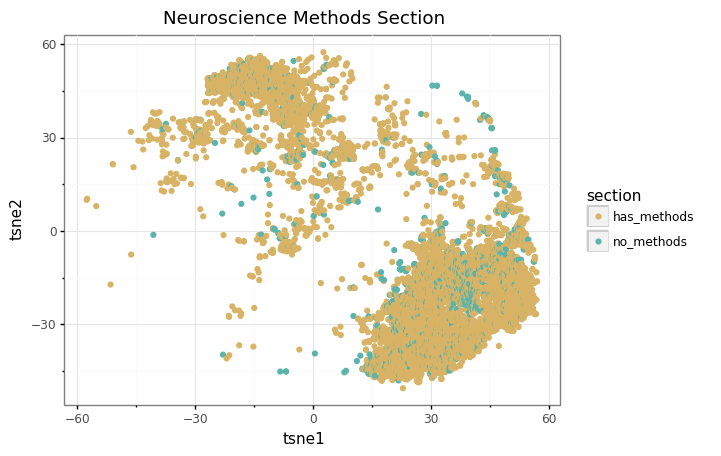

<ggplot: (8763598624334)>


In [7]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='neuroscience'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point(position=p9.position_dodge(width=0.2))
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Neuroscience Methods Section"
    )
)
g.save("output/neuroscience_missing_methods_overlapped.png", dpi=500)
print(g)

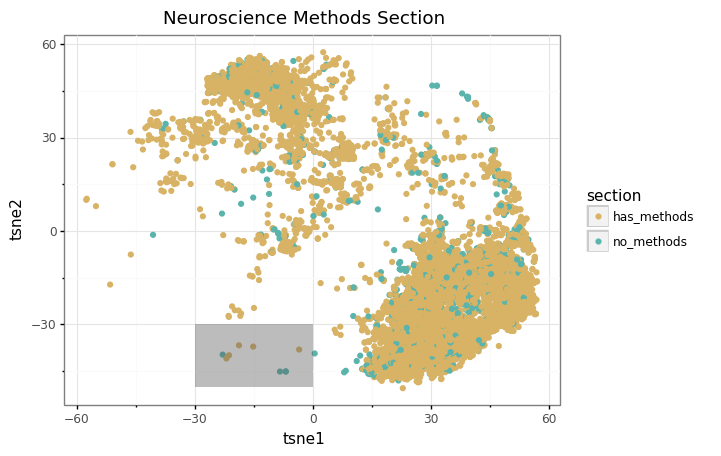

<ggplot: (8763610663628)>


In [8]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='neuroscience'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Neuroscience Methods Section"
    )
    + p9.annotate("rect", xmin=-30, xmax=0, ymin=-50, ymax=-30, alpha=0.4)
)
print(g)

In [9]:
(
    biorxiv_tsne_method_section_df
    .query("category=='neuroscience'")
    .query("tsne1 > -30 & tsne1 <=0")
    .query("tsne2 < -30")
)

,doi,document,tsne1,tsne2,category,section
299,10.1101/004176,004176_v1.xml,-22.911375,-39.708035,neuroscience,no_methods
4162,10.1101/053827,053827_v1.xml,-6.837303,-45.145546,neuroscience,no_methods
10564,10.1101/136150,136150_v1.xml,-18.768679,-36.717224,neuroscience,has_methods
12824,10.1101/164780,164780_v1.xml,-6.887979,-45.122574,neuroscience,no_methods
25757,10.1101/281097,281097_v1.xml,-21.301730,-39.916805,neuroscience,has_methods
34870,10.1101/397455,397455_v1.xml,-15.146731,-37.133850,neuroscience,has_methods
49329,10.1101/585760,585760_v1.xml,-8.339864,-45.149950,neuroscience,no_methods
61525,10.1101/743765,743765_v1.xml,-21.974096,-40.950905,neuroscience,has_methods
64501,10.1101/783811,783811_v1.xml,-3.463771,-38.080307,neuroscience,has_methods


Personal Inspection:

| Document | Comment |
| --- | --- |
| [10.1101/053827](https://doi.org/10.1101/053827) | Dense evolutionary biology paper/neuroscience? |
| [10.1101/164780](https://doi.org/10.1101/164780) | Dense evolutionary biology paper/neuroscience? |
| [10.1101/164780](https://doi.org/10.1101/164780) |  has a brief methods section at the end of the paper, but it isn't really a methods section |
| [10.1101/053827](https://doi.org/10.1101/053827) | doesn't have a methods section at all |
| [10.1101/585760](https://doi.org/10.1101/585760) | has the methods section in the supplement|
| [10.1101/004176](https://doi.org/10.1101/004176) | A prime candidate for missing sections. This is a brief article, which is missing a lot of sections except for results. |

## Bioinformatics Methods Section

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/bioinformatics_missing_methods_overlapped.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


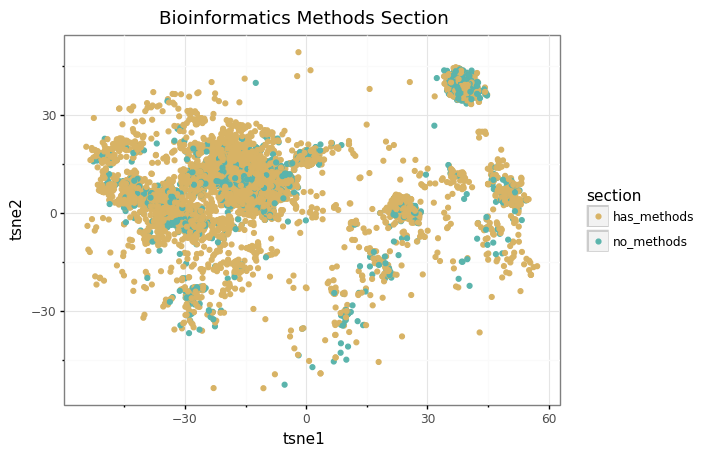

<ggplot: (8763610667205)>


In [10]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='bioinformatics'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point()
    + p9.theme_bw()

    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Bioinformatics Methods Section"
    )
)
g.save("output/bioinformatics_missing_methods_overlapped.png", dpi=500)
print(g)

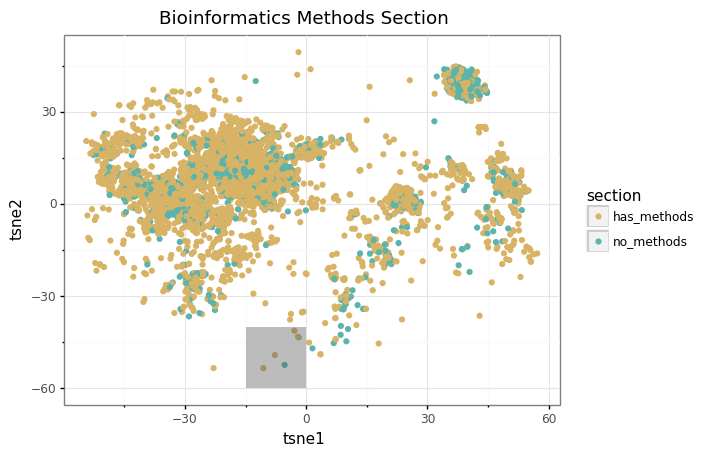

<ggplot: (-9223363273255793720)>


In [11]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='bioinformatics'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Bioinformatics Methods Section"
    )
    + p9.annotate("rect", xmin=0, xmax=-15, ymin=-60, ymax=-40, alpha=0.4)
)
print(g)

In [12]:
(
    biorxiv_tsne_method_section_df
    .query("category=='bioinformatics'")
    .query("tsne1 > 0 & tsne1 < 15")
    .query("tsne2 < -40")
)

,doi,document,tsne1,tsne2,category,section
1170,10.1101/015503,015503_v1.xml,9.930119,-44.747547,bioinformatics,no_methods
2396,10.1101/031047,031047_v1.xml,6.819845,-45.315033,bioinformatics,no_methods
15521,10.1101/198507,198507_v1.xml,3.548782,-48.923440,bioinformatics,has_methods
19488,10.1101/2020.01.28.922757,922757_v1.xml,7.244500,-44.032623,bioinformatics,has_methods
22217,10.1101/234948,234948_v1.xml,10.350061,-40.738983,bioinformatics,no_methods
34513,10.1101/392944,392944_v3.xml,1.541862,-47.041634,bioinformatics,no_methods
60900,10.1101/735589,735589_v1.xml,3.533807,-48.983210,bioinformatics,has_methods
64560,10.1101/784587,784587_v2.xml,7.309211,-44.108578,bioinformatics,has_methods
68361,10.1101/835181,835181_v2.xml,8.518440,-42.627193,bioinformatics,no_methods
70761,10.1101/867390,867390_v1.xml,0.712816,-45.141018,bioinformatics,has_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/015503](https://doi.org/10.1101/015503) | I don't think should be in biorxiv given that it is just a technical note and not a new discovery. (Plus doesn't need a methods section |
| [10.1101/031047](https://doi.org/10.1101/031047) | describes the algorithm used, which can be considered a methods section, but I argue that this isn't a regular research article nor is it really bio related. More like statistics. |
| [10.1101/234948](https://doi.org/10.1101/234948) | a statistics paper that talks about population dynamics testing. At first I thought it was a population genetics paper, but it really is a statistics paper |
| [10.1101/392944](https://doi.org/10.1101/392944) | Statistics for microbe growth modeling. It talks about a software package, so no direct methods section |
| [10.1101/835181](https://doi.org/10.1101/835181) | has a method section, so this is a false positive. Could be an xml parsing issue. | 

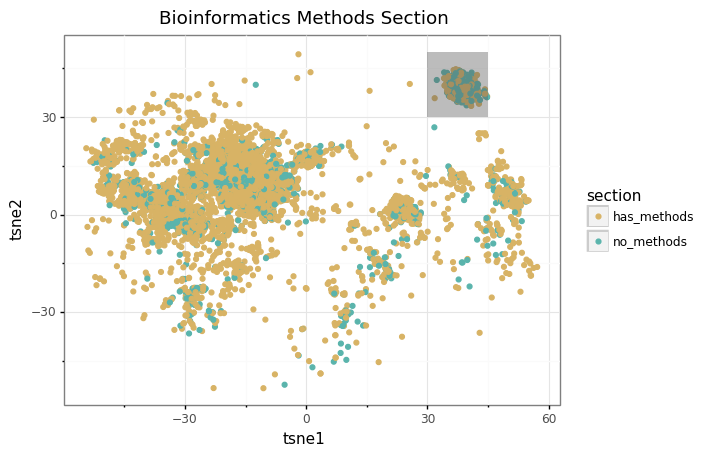

<ggplot: (-9223363273244129227)>


In [13]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='bioinformatics'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Bioinformatics Methods Section"
    )
    + p9.annotate("rect", xmin=30, xmax=45, ymin=30, ymax=50, alpha=0.4)
)
print(g)

In [14]:
(
    biorxiv_tsne_method_section_df
    .query("category=='bioinformatics'")
    .query("tsne1 > 30 & tsne1 < 45")
    .query("tsne2 > 30")
    .query("section=='no_methods'")
)

,doi,document,tsne1,tsne2,category,section
202,10.1101/002824,002824_v2.xml,39.502270,36.932133,bioinformatics,no_methods
206,10.1101/002881,002881_v1.xml,39.778770,37.398070,bioinformatics,no_methods
269,10.1101/003723,003723_v2.xml,38.112625,36.726450,bioinformatics,no_methods
362,10.1101/005033,005033_v1.xml,40.282436,41.648045,bioinformatics,no_methods
371,10.1101/005165,005165_v1.xml,38.419770,34.541140,bioinformatics,no_methods
...,...,...,...,...,...,...
69111,10.1101/845529,845529_v1.xml,37.748722,35.100730,bioinformatics,no_methods
69869,10.1101/855445,855445_v1.xml,38.089672,36.874084,bioinformatics,no_methods
70204,10.1101/859900,859900_v1.xml,37.939120,36.612760,bioinformatics,no_methods
70665,10.1101/866087,866087_v2.xml,37.635258,35.194866,bioinformatics,no_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/002824](https://doi.org/10.1101/002824) | software paper so no real need for a methods section |
| [10.1101/002881](https://doi.org/10.1101/002881) | software paper so no real need for a methods section |
| [10.1101/003723](https://doi.org/10.1101/003723) | software paper so no real need for a methods section |
| [10.1101/859900](https://doi.org/10.1101/859900) | software paper so no real need for a methods section |
| [10.1101/866087](https://doi.org/10.1101/866087) | software paper so no real need for a methods section |
| [10.1101/870170](https://doi.org/10.1101/870170) | software paper so no real need for a methods section | 
| [10.1101/845529](https://doi.org/10.1101/845529) | software paper so no real need for a methods section |

## Microbiology Methods Section

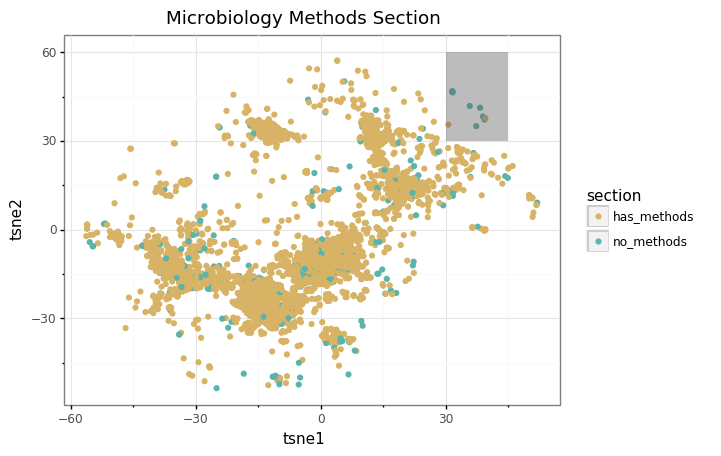

<ggplot: (-9223363273255279942)>


In [15]:
g = (
    p9.ggplot(
        biorxiv_tsne_method_section_df
        .query("category=='microbiology'")
    )
    + p9.aes(x="tsne1", y="tsne2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Microbiology Methods Section"
    )
    + p9.annotate("rect", xmin=30, xmax=45, ymin=30, ymax=60, alpha=0.4)
)
print(g)

In [16]:
(
    biorxiv_tsne_method_section_df
    .query("category=='microbiology'")
    .query("tsne1 > 30 & tsne1 < 45")
    .query("tsne2 > 30")
)

,doi,document,tsne1,tsne2,category,section
13784,10.1101/176784,176784_v1.xml,37.322475,34.975677,microbiology,no_methods
18830,10.1101/2020.01.20.913202,913202_v2.xml,31.558317,46.748630,microbiology,no_methods
20533,10.1101/213421,213421_v1.xml,30.606756,35.499554,microbiology,has_methods
20699,10.1101/215525,215525_v1.xml,35.748943,41.799990,microbiology,no_methods
30954,10.1101/347625,347625_v1.xml,39.288030,37.207703,microbiology,no_methods
41375,10.1101/482380,482380_v1.xml,38.915260,38.250923,microbiology,no_methods
43336,10.1101/507731,507731_v3.xml,39.507862,37.742687,microbiology,has_methods
45229,10.1101/532267,532267_v1.xml,38.243320,41.221910,microbiology,no_methods
51374,10.1101/612093,612093_v2.xml,31.595543,46.637120,microbiology,no_methods
57368,10.1101/689646,689646_v1.xml,31.556183,46.762670,microbiology,no_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/2020.01.20.913202](https://doi.org/10.1101/2020.01.20.913202) | article withdrawals, so obviously a method section is not needed |
| [10.1101/612093](https://doi.org/10.1101/612093) | article withdrawals, so obviously a method section is not needed |
| [10.1101/176784](https://doi.org/10.1101/176784) | software paper |
| [10.1101/215525](https://doi.org/10.1101/215525) | software paper |
| [10.1101/482380](https://doi.org/10.1101/482380) | software paper |
| [10.1101/532267](https://doi.org/10.1101/532267) | data repository paper so I guess it falls under the software group |
| [10.1101/347625](https://doi.org/10.1101/347625) | no headings at all, which could be a prime example for missing methods section |

# UMAP Embeddings for BioRxiv

In [17]:
biorxiv_embeddings_df = pd.read_csv(
    "../word_vector_experiment/output/embedding_output/umap/biorxiv_umap_300.tsv", 
    sep="\t"
)
biorxiv_embeddings_df.head()

,umap1,umap2,document,category,doi
0,4.203613,1.386911,440735_v1.xml,genetics,10.1101/440735
1,-3.084304,3.360176,775270_v1.xml,systems biology,10.1101/775270
2,3.374992,1.768752,242404_v1.xml,genetics,10.1101/242404
3,0.954577,7.670865,872994_v1.xml,neuroscience,10.1101/2019.12.11.872994
4,0.977274,-5.010554,080853_v2.xml,developmental biology,10.1101/080853


In [18]:
biorxiv_umap_method_section_df = (
    pd.merge(
        biorxiv_embeddings_df, 
        biorxiv_sections_df.query("section=='material and methods'").drop_duplicates(),
        on="document",
        how="left"
    )
    .assign(section=lambda x: x.section.apply(lambda x: "has_methods" if x=="material and methods" else "no_methods"))
    .groupby("doi")
    .agg({
        "doi": "last",
        "document": "last",
        "umap1": "last",
        "umap2": "last",
        "category":"last",
        "section": "last",
    })
    .reset_index(drop=True)
)
biorxiv_umap_method_section_df.head()

,doi,document,umap1,umap2,category,section
0,10.1101/000026,000026_v1.xml,-1.610427,1.291301,genetics,has_methods
1,10.1101/000042,000042_v2.xml,2.216146,2.827643,genomics,no_methods
2,10.1101/000067,000067_v1.xml,1.759242,-0.962909,genomics,has_methods
3,10.1101/000091,000091_v1.xml,-0.624647,3.541729,synthetic biology,no_methods
4,10.1101/000109,000109_v1.xml,-1.544775,0.572387,evolutionary biology,has_methods


## Global View of Umap Plot

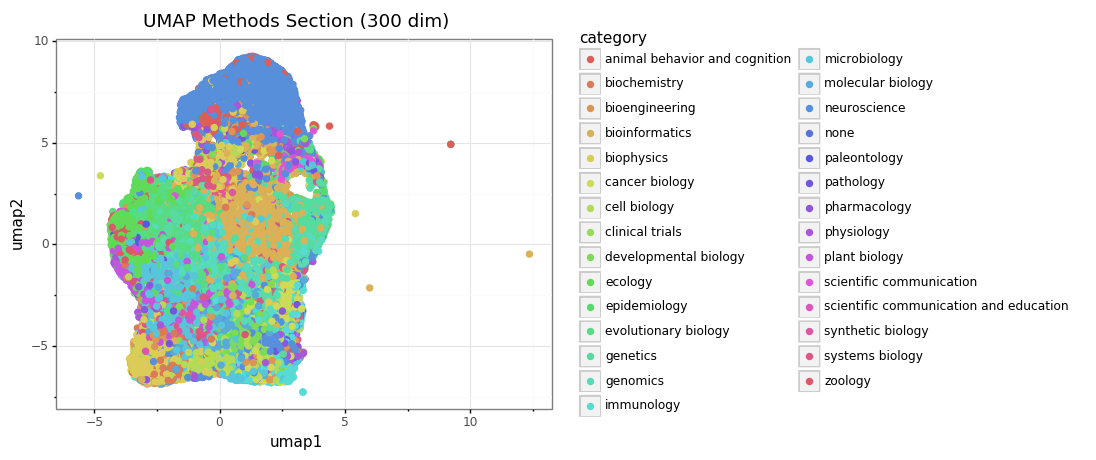

<ggplot: (-9223363273255334996)>


In [19]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
    )
    + p9.aes(x="umap1", y="umap2", color="category")
    + p9.geom_point(size=2)
    + p9.theme_bw()
    + p9.labs(
        title="UMAP Methods Section (300 dim)"
    )
)
print(g)

## Neuroscience Methods Section

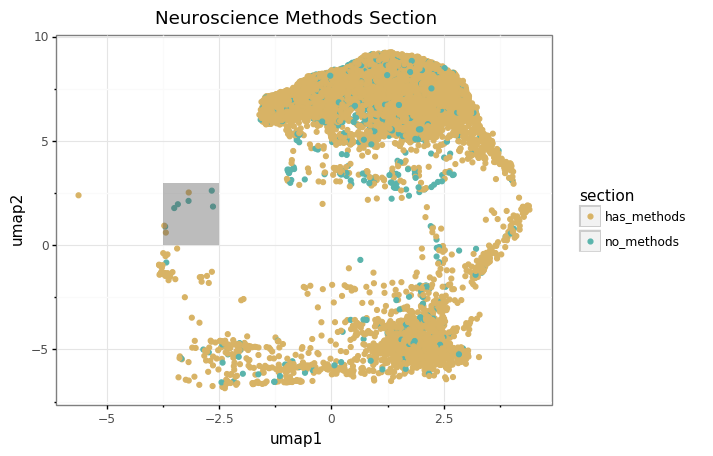

<ggplot: (-9223363273247499811)>


In [20]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
        .query("category=='neuroscience'")
    )
    + p9.aes(x="umap1", y="umap2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Neuroscience Methods Section"
    )
    + p9.annotate("rect", xmin=-3.75, xmax=-2.5, ymin=0, ymax=3, alpha=0.4)
)
print(g)

In [21]:
(
    biorxiv_umap_method_section_df
    .query("category=='neuroscience'")
    .query("umap1 < -2.5 & umap1 > -3.75")
    .query("umap2 > 0")
)

,doi,document,umap1,umap2,category,section
299,10.1101/004176,004176_v1.xml,-3.700293,0.896125,neuroscience,no_methods
4162,10.1101/053827,053827_v1.xml,-3.418009,1.967329,neuroscience,no_methods
12824,10.1101/164780,164780_v1.xml,-3.498269,1.783505,neuroscience,no_methods
25757,10.1101/281097,281097_v1.xml,-3.685596,0.607273,neuroscience,has_methods
30912,10.1101/347070,347070_v1.xml,-2.663444,2.619911,neuroscience,no_methods
45925,10.1101/541243,541243_v1.xml,-2.636350,1.856265,neuroscience,no_methods
49329,10.1101/585760,585760_v1.xml,-3.180205,2.128365,neuroscience,no_methods
61525,10.1101/743765,743765_v1.xml,-3.720332,0.937915,neuroscience,has_methods
67763,10.1101/827212,827212_v1.xml,-3.176327,2.531841,neuroscience,has_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [[10.1101/004176](https://doi.org/10.1101/004176)](https://doi.org/[10.1101/004176](https://doi.org/10.1101/004176)) | is a short article that doesn't have any section headers |
| [10.1101/053827](https://doi.org/10.1101/053827) | already identified look at section 2.2 |
| [10.1101/164780](https://doi.org/10.1101/164780) | already identified look at section 2.2 |
| [10.1101/585760](https://doi.org/10.1101/585760) | already identified look at section 2.2 |
| [10.1101/347070](https://doi.org/10.1101/347070) | has methods section labeled as "the proposed approach". It also seems like this paper should belong in PsyRxiv rather than biorxiv |
| [10.1101/541243](https://doi.org/10.1101/541243) | has a methods section, but labeled as something else, which is why I couldn't detect it with my parser |

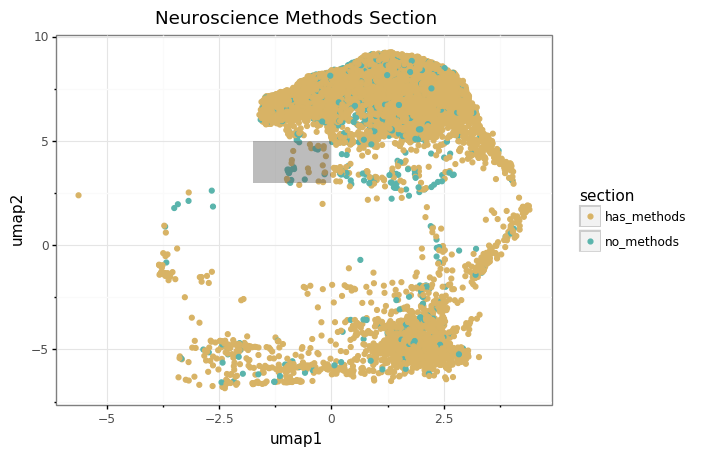

<ggplot: (8763593983720)>


In [22]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
        .query("category=='neuroscience'")
    )
    + p9.aes(x="umap1", y="umap2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Neuroscience Methods Section"
    )
    + p9.annotate("rect", xmin=-1.75, xmax=0, ymin=3, ymax=5, alpha=0.4)
)
print(g)

In [23]:
(
    biorxiv_umap_method_section_df
    .query("category=='neuroscience'")
    .query("umap1 >-1.75 & umap1 < 0")
    .query("umap2 > 3 & umap2 < 5")
    .query("section=='no_methods'")
)

,doi,document,umap1,umap2,category,section
103,10.1101/001586,001586_v1.xml,-0.593277,3.157204,neuroscience,no_methods
1484,10.1101/019398,019398_v2.xml,-0.969674,3.573446,neuroscience,no_methods
2650,10.1101/034199,034199_v1.xml,-0.893435,3.131273,neuroscience,no_methods
3407,10.1101/043976,043976_v1.xml,-0.924128,3.599097,neuroscience,no_methods
5104,10.1101/066480,066480_v1.xml,-0.925945,3.566682,neuroscience,no_methods
7137,10.1101/092973,092973_v1.xml,-0.153217,3.407133,neuroscience,no_methods
12348,10.1101/158485,158485_v2.xml,-0.952566,3.499408,neuroscience,no_methods
15439,10.1101/197483,197483_v1.xml,-0.948084,3.501558,neuroscience,no_methods
17059,10.1101/2019.12.27.889196,889196_v1.xml,-0.839587,3.742926,neuroscience,no_methods
46015,10.1101/542431,542431_v1.xml,-0.830530,3.655271,neuroscience,no_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/001586](https://doi.org/10.1101/001586) | a theorem proof, which shouldn't have a methods section | 
| [10.1101/019398](https://doi.org/10.1101/019398) | math heavy paper on decision making |
| [10.1101/034199](https://doi.org/10.1101/034199) | math focused paper |
| [10.1101/043976](https://doi.org/10.1101/043976) | Math paper about modeling a neural network (neuroscience context) |
| [10.1101/066480](https://doi.org/10.1101/066480) | Math paper |

## Bioinformatics Method Section

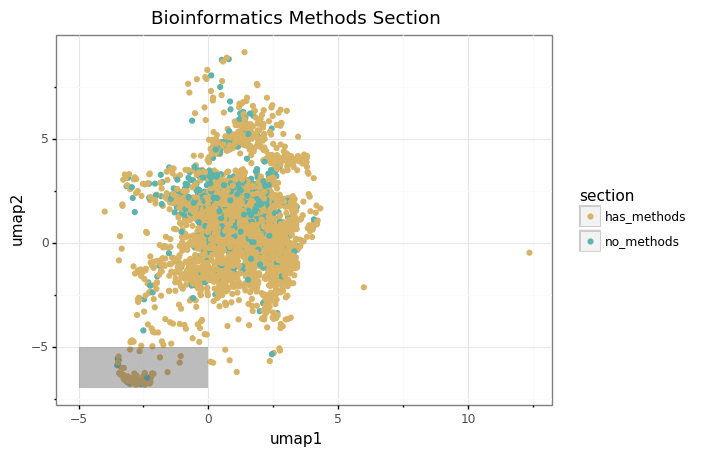

<ggplot: (-9223363273259825422)>


In [24]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
        .query("category=='bioinformatics'")
    )
    + p9.aes(x="umap1", y="umap2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Bioinformatics Methods Section"
    )
    + p9.annotate("rect", xmin=-5, xmax=0, ymin=-7, ymax=-5, alpha=0.4)
)
print(g)

In [25]:
(
    biorxiv_umap_method_section_df
    .query("category=='bioinformatics'")
    .query("umap1 < 0 & umap1 > -5")
    .query("umap2 < -5")
    .query("section=='no_methods'")
)

,doi,document,umap1,umap2,category,section
3877,10.1101/050047,050047_v1.xml,-2.565061,-6.703264,bioinformatics,no_methods
7966,10.1101/103283,103283_v1.xml,-2.846632,-6.658052,bioinformatics,no_methods
10419,10.1101/134288,134288_v1.xml,-2.875848,-6.690618,bioinformatics,no_methods
10893,10.1101/140376,140376_v1.xml,-2.594263,-6.802521,bioinformatics,no_methods
27616,10.1101/304931,304931_v1.xml,-3.137548,-6.686564,bioinformatics,no_methods
28359,10.1101/314625,314625_v1.xml,-2.441408,-6.644167,bioinformatics,no_methods
39852,10.1101/462614,462614_v1.xml,-3.455344,-5.650293,bioinformatics,no_methods
45675,10.1101/538025,538025_v1.xml,-3.506795,-5.897267,bioinformatics,no_methods
49123,10.1101/583187,583187_v1.xml,-3.488192,-5.568578,bioinformatics,no_methods
59045,10.1101/711416,711416_v1.xml,-2.357926,-6.490403,bioinformatics,no_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/050047](https://doi.org/10.1101/050047) | doesn't have any sections, but quick glance only shows results. Could be a candidate for "needs a methods section" hunt. |
| [10.1101/103283](https://doi.org/10.1101/103283) | is a false positive. It has a methods and material section. Could be a parser error. |
| [10.1101/134288](https://doi.org/10.1101/134288) | is a weirdly formatted paper, but I didn't see a methods section in sight. |
| [10.1101/140376](https://doi.org/10.1101/140376) | is a borderline article where it is written like a literature survey, but has analysis and results. No method section though. |

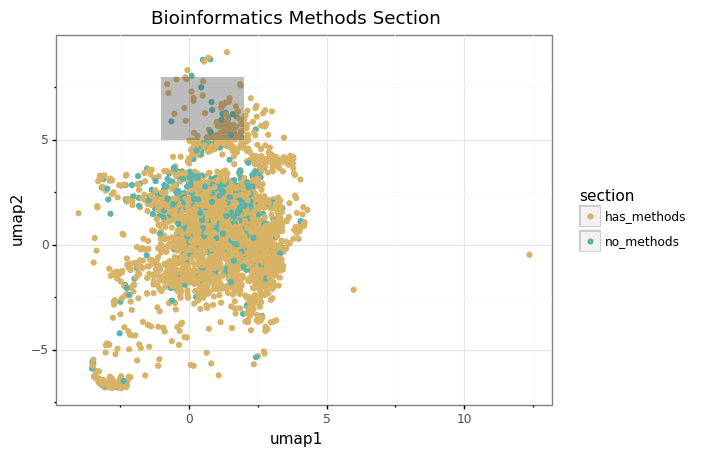

<ggplot: (8763594256630)>


In [26]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
        .query("category=='bioinformatics'")
    )
    + p9.aes(x="umap1", y="umap2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Bioinformatics Methods Section"
    )
    + p9.annotate("rect", xmin=-1, xmax=2, ymin=5, ymax=8, alpha=0.4)
)
print(g)

In [27]:
(
    biorxiv_umap_method_section_df
    .query("umap1 > -1 & umap1 < 2")
    .query("umap2 > 5")
    .query("section=='no_methods'")
    .query("category=='bioinformatics'")
)

,doi,document,umap1,umap2,category,section
2075,10.1101/026898,026898_v1.xml,1.427783,5.517081,bioinformatics,no_methods
3020,10.1101/038919,038919_v1.xml,0.514867,8.812214,bioinformatics,no_methods
5133,10.1101/066910,066910_v1.xml,1.558380,5.289375,bioinformatics,no_methods
5191,10.1101/067702,067702_v2.xml,1.730200,6.121919,bioinformatics,no_methods
5874,10.1101/076646,076646_v3.xml,1.427678,5.750630,bioinformatics,no_methods
6721,10.1101/087726,087726_v1.xml,0.775273,5.048500,bioinformatics,no_methods
7112,10.1101/092627,092627_v1.xml,1.215025,5.751402,bioinformatics,no_methods
9455,10.1101/121962,121962_v2.xml,1.013421,5.077864,bioinformatics,no_methods
10391,10.1101/133967,133967_v1.xml,0.833379,6.807992,bioinformatics,no_methods
10946,10.1101/141036,141036_v3.xml,1.381885,5.535621,bioinformatics,no_methods


Personal Interpretation:

| Document | Comment |
| --- | --- |
| [10.1101/026898](https://doi.org/10.1101/026898) | diffusion fmri dataset paper |
| [10.1101/038919](https://doi.org/10.1101/038919) | Multitask modeling...? Something about human multitasking and how they model that |
| [10.1101/066910](https://doi.org/10.1101/066910) | fmri deep learning paper. Has methods section labeled as "background and algorithms" |
| [10.1101/067702](https://doi.org/10.1101/067702) | Methods section is relabeled as approach |

## Microbiology Methods Section

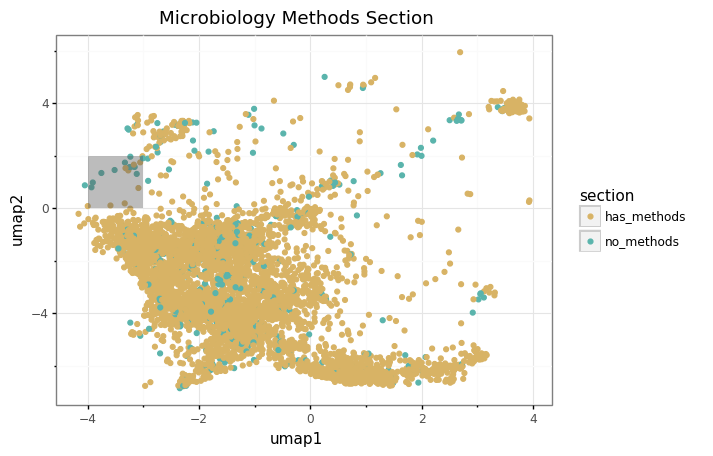

<ggplot: (-9223363273244218154)>


In [28]:
g = (
    p9.ggplot(
        biorxiv_umap_method_section_df
        .query("category=='microbiology'")
    )
    + p9.aes(x="umap1", y="umap2", color="section")
    + p9.geom_point()
    + p9.theme_bw()
    + p9.scale_color_manual({
        "has_methods": "#d8b365",
        "no_methods": "#5ab4ac"
    })
    + p9.labs(
        title="Microbiology Methods Section"
    )
    + p9.annotate("rect", xmin=-4, xmax=-3, ymin=0, ymax=2, alpha=0.4)
)
print(g)

In [29]:
(
    biorxiv_umap_method_section_df
    .query("category=='microbiology'")
    .query("umap1 > -4 & umap1 < -3")
    .query("umap2 > 0 & umap2 < 2")
)

,doi,document,umap1,umap2,category,section
2180,10.1101/028209,028209_v1.xml,-3.332174,1.744376,microbiology,no_methods
5003,10.1101/065128,065128_v4.xml,-3.192416,1.593088,microbiology,no_methods
7354,10.1101/095745,095745_v1.xml,-3.119950,1.313371,microbiology,no_methods
7810,10.1101/101436,101436_v2.xml,-3.256429,1.533578,microbiology,no_methods
9347,10.1101/120493,120493_v1.xml,-3.156471,1.579318,microbiology,no_methods
11424,10.1101/147009,147009_v1.xml,-3.089334,0.774755,microbiology,has_methods
12394,10.1101/159087,159087_v1.xml,-3.271448,1.445674,microbiology,has_methods
12841,10.1101/165001,165001_v1.xml,-3.517305,1.461190,microbiology,no_methods
18892,10.1101/2020.01.21.913830,913830_v1.xml,-3.335893,0.188902,microbiology,has_methods
28060,10.1101/310649,310649_v2.xml,-3.057271,1.753361,microbiology,has_methods


Personal Interpretation:

| Document | Comment | 
| --- | --- | 
| [10.1101/028209](https://doi.org/10.1101/028209) | No defined method section header however they do describe their model |
| [10.1101/065128](https://doi.org/10.1101/065128) | No defined method section but definitely has it integrated in the paper |
| [10.1101/095745](https://doi.org/10.1101/095745) | is a literature review about hand drying and cleanliness... |
| [10.1101/101436](https://doi.org/10.1101/101436) | No section headers except for abstract |